### Since logistic regression can only be used to classify binary output (e.g. 0 or 1, yes or no), we are not able to predict exact number, but what we can do is to implement a function that given input 'sales number', we can classify whether is larger, or lower. By using Bisection method(maybe 2 or 3 times), we can get an estimation of the actual sales.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Fully_Encoded.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,10919.0,26.0,2006.0,10.0,361.0,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,77.000000,322.000000,1008.000000,1.000000
1,9265.0,11.0,1985.0,4.0,361.0,29.08,3.58,6.81,0.77,40.24,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
2,5534.0,26.0,2008.0,6.0,361.0,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,80.000000,709.000000,1008.000000,1.000000
3,10921.0,26.0,2009.0,10.0,361.0,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,77.000000,192.000000,1008.000000,1.000000
4,7294.0,5.0,1996.0,7.0,361.0,11.27,8.89,10.22,1.00,31.37,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16416 entries, 0 to 16415
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  float64
 1   Platform         16416 non-null  float64
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  float64
 4   Publisher        16416 non-null  float64
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
 10  Critic_Score     16416 non-null  float64
 11  Critic_Count     16416 non-null  float64
 12  User_Score       16416 non-null  float64
 13  User_Count       16416 non-null  float64
 14  Developer        16416 non-null  float64
 15  Rating           16416 non-null  float64
dtypes: float64(16)
memory usage: 2.0 MB


In [4]:
X = df.iloc[:,[1,2,3,4,9,10,11,12,13,14,15]]
y = df.iloc[:,[5,6,7,8]]
X.head()

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,26.0,2006.0,10.0,361.0,82.53,76.000000,51.000000,77.000000,322.000000,1008.000000,1.000000
1,11.0,1985.0,4.0,361.0,40.24,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616
2,26.0,2008.0,6.0,361.0,35.52,82.000000,73.000000,80.000000,709.000000,1008.000000,1.000000
3,26.0,2009.0,10.0,361.0,32.77,80.000000,73.000000,77.000000,192.000000,1008.000000,1.000000
4,5.0,1996.0,7.0,361.0,31.37,68.997119,26.440992,74.727254,163.008846,835.050081,3.558616


In [5]:
y.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,41.36,28.96,3.77,8.45
1,29.08,3.58,6.81,0.77
2,15.68,12.76,3.79,3.29
3,15.61,10.93,3.28,2.95
4,11.27,8.89,10.22,1.00


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Here we binarilize the sales by threshold
### First we use mean of each sales
### Currently if change `mean()` to `median()`, there's somehow a bug that output `JP_Sales` bisec as all 1, thus can't fit into clf

In [7]:
def get_threshold(sale_list):
    threshold = []
    for i in range(sale_list.shape[1]):
        threshold.append(sale_list.iloc[:,i].mean())
    return threshold

In [8]:
def trans_bisec(sale_list, threshold):
    for i in range(sale_list.shape[0]):
        if sale_list.iloc[i] >= threshold:
            sale_list.iloc[i] = 1
        else:
            sale_list.iloc[i] = 0
    return sale_list

In [9]:
def evaluat(y_pred, y_test):
    count = 0
    correct = 0
    for i in range(y_pred.size):
        if y_pred[i] == y_test.iloc[i]:
            correct += 1
        count += 1
    return correct / count

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
region_list = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
threshold = get_threshold(y_train)
accuracy_list = []

for i in range(4):
    clf = linear_model.LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_train, trans_bisec(y_train[region_list[i]], threshold[i]))
    y_pred = clf.predict(X_test)
    accuracy = evaluat(y_pred, trans_bisec(y_test[region_list[i]], threshold[i]))
    accuracy_list.append(accuracy)
    print('The accuracy of ', region_list[i], 'is: ', accuracy)


The accuracy of  NA_Sales is:  0.9092570036540804
The accuracy of  EU_Sales is:  0.8873325213154689
The accuracy of  JP_Sales is:  0.8246041412911084
The accuracy of  Other_Sales is:  0.902557856272838


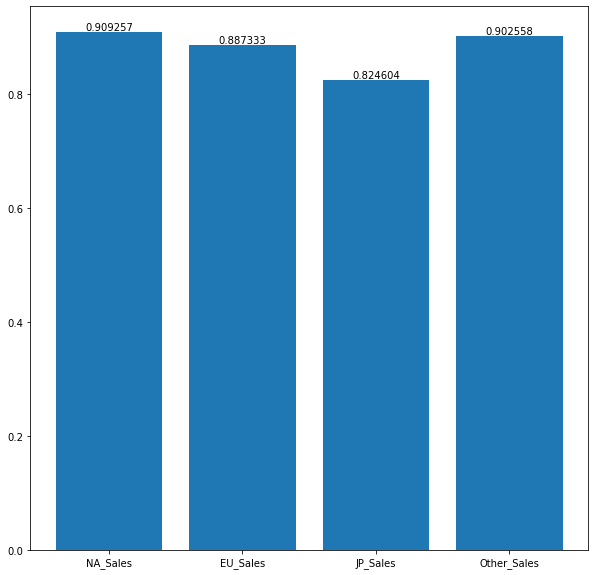

In [11]:
fig = plt.figure(figsize=(10,10))
bar = plt.bar(region_list, accuracy_list)
plt.bar_label(bar, label_type='edge')
plt.show()

### The accuracy is fine. If we do bisection method multiple times we'll be able to locate the acutal sales.